Import libraries

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, ceil

# Find the Root of the Function

Let's start by looking at a sample function and plotting it

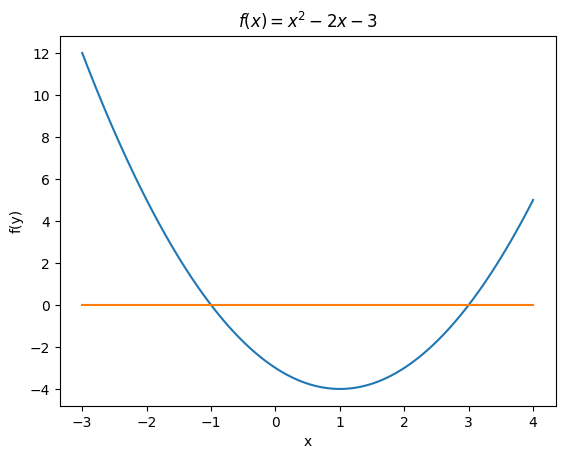

In [170]:
def f(x):
    return x**2 - 2*x - 3

x = np.linspace(-3,4,100)
plt.plot(x,f(x))
plt.plot(x,np.zeros(x.shape))
plt.xlabel('x')
plt.ylabel('f(y)')
plt.title(r'$f(x) = x^2 - 2x - 3$')
plt.show()

# Bisection Method

Bisection method algorithm

In [171]:
def bisection(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: new x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** BISECTION METHOD ***')

    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True
    
    # loop as long as the residual is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'Not Convergent within {maxIter} iterations')
            break
        
        # calculate midpoint
        xNew = (x0 + x1)/2
        
        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew

        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}\n')

    return xNew, iterations, residuals

How many iterations will it take to converge?

In [172]:
def bisectionNumIterations(x0,x1,eps):
    #==================================================================
    # INPUTS
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    # OUTPUT
    #   - xNew: number of iterations to converge
    #==================================================================
    return ceil(log2(abs(x1-x0) / eps))

x0 = -5
x1 = 1
tol = 1e-6

numIter = bisectionNumIterations(x0,x1,tol)
print(f'x0 = {x0}')
print(f'x1 = {x1}')
print(f'tolerance = {tol}')
print('------------------')
print(f'ITERATIONS TO CONVERGE WITH BISECTION = {numIter}')

x0 = -5
x1 = 1
tolerance = 1e-06
------------------
ITERATIONS TO CONVERGE WITH BISECTION = 23


Test the algorithm and plot it

*** BISECTION METHOD ***
final x-value: -1.000000238418579
iterations: 22
residual: 9.536743732496689e-07



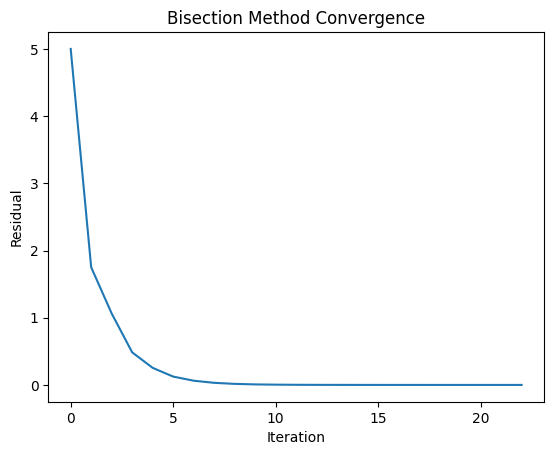

In [173]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, residuals = bisection(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Bisection Method Convergence')
plt.show()


# Secant Method

Secant method algorithm

In [174]:
def secant(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: new x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** SECANT METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the residual is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply secant method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))
        x0 = x1
        x1 = xNew
        
        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}\n')

    return xNew, iterations, residuals

Test the algorithm and plot it

*** SECANT METHOD ***
final x-value: -0.9999999997671694
iterations: 8
residual: -9.313225746154785e-10



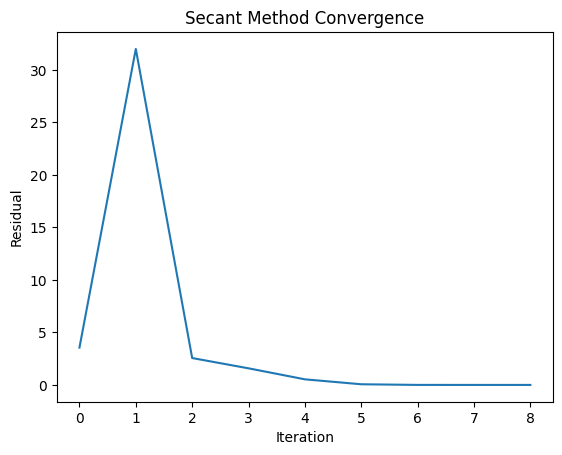

In [175]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, residuals = secant(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Secant Method Convergence')
plt.show()

# Regula-Falsi Method

Regula-Falsi method algorithm

In [176]:
def regula_falsi(func,x0,x1,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - x0: left boundary
    #   - x1: right boundary
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: new x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** REGULA-FALSI METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the residual is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Regula-Falsi method algorithm
        xNew = x0 - (x1-x0)*func(x0) / (func(x1)-func(x0))

        # check boundaries to decide which to replace
        if func(x0)*func(xNew) < 0:
            # replace right boundary
            x1 = xNew
        else:
            # replace left boundary
            x0 = xNew
        
        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1
    
    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}\n')

    return xNew, iterations, residuals

Test the algorithm and plot it

*** REGULA-FALSI METHOD ***
final x-value: -0.9999997615814351
iterations: 23
residual: -9.536742027194123e-07



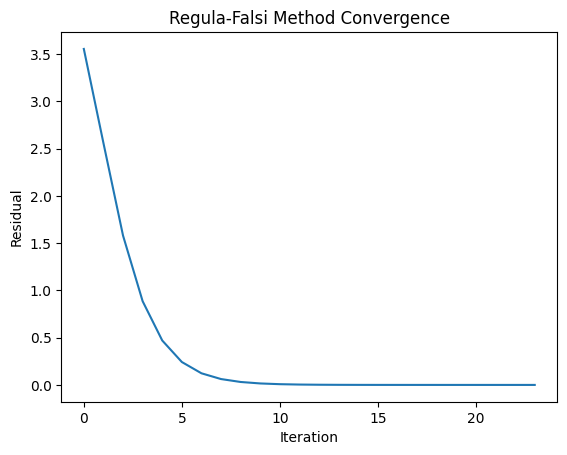

In [177]:
x0 = -5
x1 = 1
tol = 1e-6

xNew, iterations, residuals = regula_falsi(f,x0,x1,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Regula-Falsi Method Convergence')
plt.show()

# Fixed Point Iterative Method

Define functions of the form `x = g(x)` and plot them

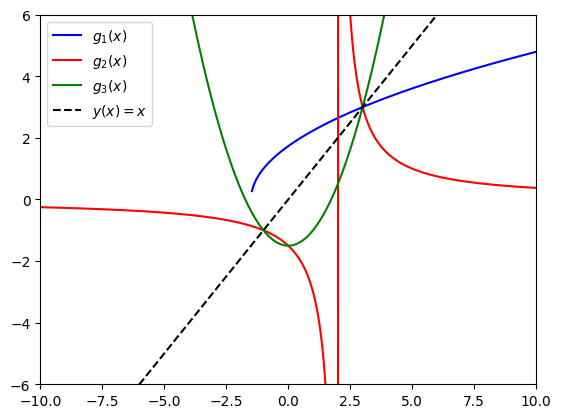

In [178]:
def g1(x):
    return np.sqrt(2*x + 3)

def g2(x):
    return 3 / (x-2)

def g3(x):
    return (x**2 - 3) / 2

x = np.linspace(-10,10,500)

plt.plot(x[x>=-3/2],g1(x[x>=-3/2]),'b',label=r'$g_1(x)$')
plt.plot(x,g2(x),'r',label=r'$g_2(x)$')
plt.plot(x,g3(x),'g',label=r'$g_3(x)$')
plt.plot(x,x,'k--',label=r'$y(x) = x$')
plt.xlim([-10,10])
plt.ylim([-6,6])
plt.legend()
plt.show()

Fixed-point iterative algorithm

In [179]:
def fixed_point_iteration(func,gFunc,x,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle for g(x)
    #   - x: initial guess
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: new x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** FIXED POINT ITERATION METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []
    xList = [x]

    # initialize check condition as True to start the loop
    condition = True

    while condition:        
        # check for convergence
        if i >= 2:
            if abs(xList[i] - xList[i-1]) > abs(xList[i-1] - xList[i-2]):
                print('ERROR: g(x) does not meet convergence criteria')
                break
        
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break

        # calculate new x-value and apply fixed point iteration algorithm
        xNew = gFunc(x)
        x = xNew

        # log x, iteration, and residual
        xList.append(xNew)
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}\n')
        
    return xNew, iterations, residuals

*** FIXED POINT ITERATION METHOD ***
final x-value: 2.9999999004685307
iterations: 15
residual: -3.981258664964571e-07

*** FIXED POINT ITERATION METHOD ***
final x-value: -1.0000000929222947
iterations: 14
residual: 3.716891878724482e-07



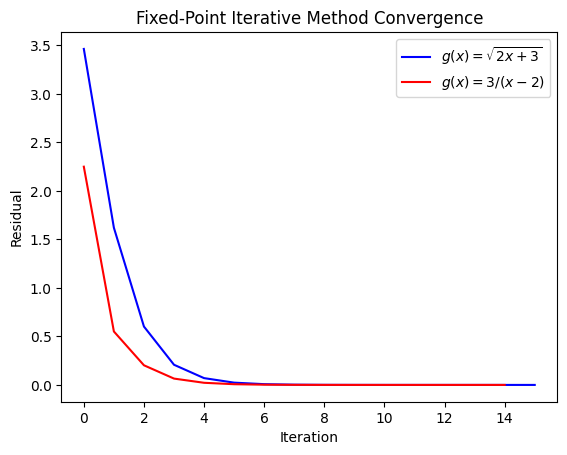

In [180]:
x0 = 0
tol = 1e-6

_, iterations1, residuals1 = fixed_point_iteration(f,g1,x0,tol)
_, iterations2, residuals2 = fixed_point_iteration(f,g2,x0,tol)

plt.plot(iterations1,residuals1,'b',label=r'$g(x) = \sqrt{2x+3}$')
plt.plot(iterations2,residuals2,'r',label=r'$g(x) = 3 / (x-2)$')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Fixed-Point Iterative Method Convergence')
plt.legend()
plt.show()

# Newton-Raphson Method

Define the derivative function

In [181]:
def df(x):
    return 2*x - 2

Newton-Raphson method algorithm

In [182]:
def newton_raphson(func,dFunc,x,eps,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - x: initial guess
    #   - eps: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: new x-value caculated by this method
    #   - iterations: array of iterations counted
    #   - residuals: array of residuals corresponding to each iteration
    #==================================================================

    print('*** NEWTON-RAPHSON METHOD ***')
    
    # declare variables
    i = 0
    iterations = []
    residuals = []
    xNew = x

    # initialize check condition as True to start the loop
    condition = True

    while condition:
        # force while loop to stop after a certain amount of iterations
        if dFunc(x) == 0:
            print(f'ERROR: Divide by zero')
            break

        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # calculate new x-value and apply Newton-Raphson algorithm
        xNew = x - func(x)/dFunc(x)
        x = xNew

        # log iteration and residual
        iterations.append(i)
        residuals.append(abs(func(xNew)))
        
        # set new tolerance condition for the while loop to check
        condition = abs(func(xNew)) > eps

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'residual: {func(xNew)}\n')
        
    return xNew, iterations, residuals

Test the algorithm and plot it

*** NEWTON-RAPHSON METHOD ***
final x-value: -1.0000000929222947
iterations: 3
residual: 3.716891878724482e-07



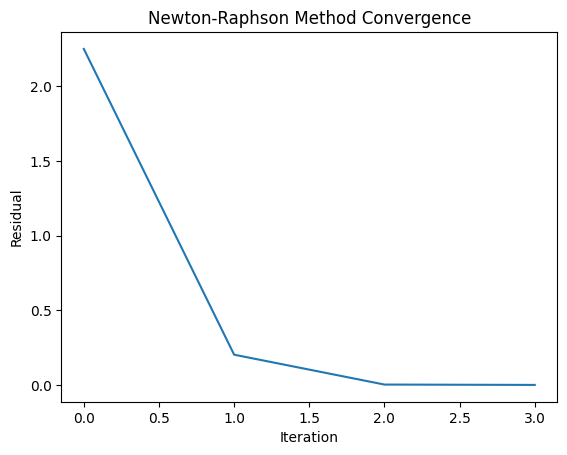

In [183]:
x0 = 0
tol = 1e-6

xNew, iterations, residuals = newton_raphson(f,df,x0,tol)

plt.plot(iterations,residuals)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title('Newton-Raphson Method Convergence')
plt.show()

# Compare Methods

Compute the roots of the function with each method

In [188]:
# left/right bounds for Bisection, Secant, and Regula-Falsi
xLeft = -5
xRight = 1
# initial guess for Fixed-Point and Newton-Raphson
xGuess = 0
# tolerance
tol = 1e-10

# Compute roots
xNew1, iterations1, residuals1 = bisection(f,xLeft,xRight,tol)
xNew2, iterations2, residuals2 = secant(f,xLeft,xRight,tol)
xNew3, iterations3, residuals3 = regula_falsi(f,xLeft,xRight,tol)
xNew4, iterations4, residuals4 = fixed_point_iteration(f,g1,xGuess,tol)
xNew5, iterations5, residuals5 = fixed_point_iteration(f,g2,xGuess,tol)
xNew6, iterations6, residuals6 = newton_raphson(f,df,xGuess,tol)

*** BISECTION METHOD ***
final x-value: -1.000000000014552
iterations: 36
residual: 5.820766091346741e-11

*** SECANT METHOD ***
final x-value: -0.9999999999999999
iterations: 9
residual: -4.440892098500626e-16

*** REGULA-FALSI METHOD ***
final x-value: -0.9999999999854481
iterations: 37
residual: -5.820766091346741e-11

*** FIXED POINT ITERATION METHOD ***
final x-value: 2.99999999998483
iterations: 23
residual: -6.068034963391256e-11

*** FIXED POINT ITERATION METHOD ***
final x-value: -1.0000000000141627
iterations: 22
residual: 5.665068414373309e-11

*** NEWTON-RAPHSON METHOD ***
final x-value: -1.000000000000002
iterations: 4
residual: 7.993605777301127e-15



Plot the convergence for all methods

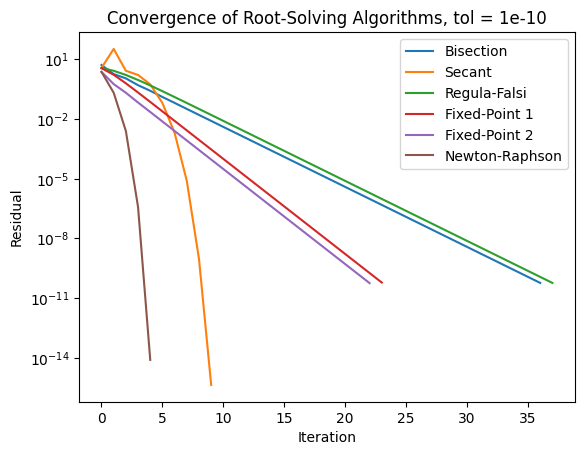

In [190]:
plt.semilogy(iterations1,residuals1,label='Bisection')
plt.semilogy(iterations2,residuals2,label='Secant')
plt.semilogy(iterations3,residuals3,label='Regula-Falsi')
plt.semilogy(iterations4,residuals4,label='Fixed-Point 1')
plt.semilogy(iterations5,residuals5,label='Fixed-Point 2')
plt.semilogy(iterations6,residuals6,label='Newton-Raphson')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title(f'Convergence of Root-Solving Algorithms, tol = {tol}')
plt.legend()
plt.show()